1. Viết chương trình biến đổi ảnh

1.1. Chọn đối tượng trong ảnh

(1427, 2100, 3)


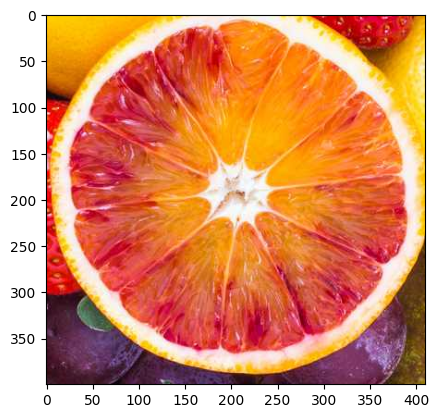

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()

1.2. Tịnh tiến đơn

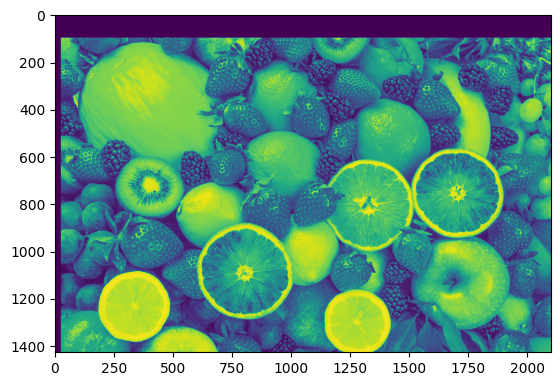

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg', mode='F')
bdata = nd.shift(data, (100, 25))
plt.imshow(bdata)
plt.show()

1.3. Thay đổi kích thước ảnh 

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


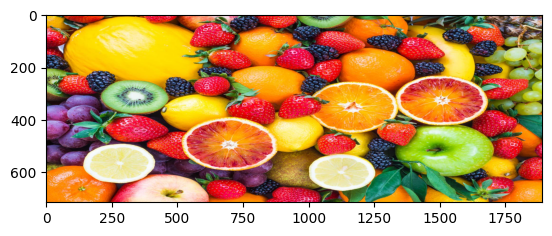

In [4]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()

1.4. Xoay ảnh

(1427, 2100, 3)


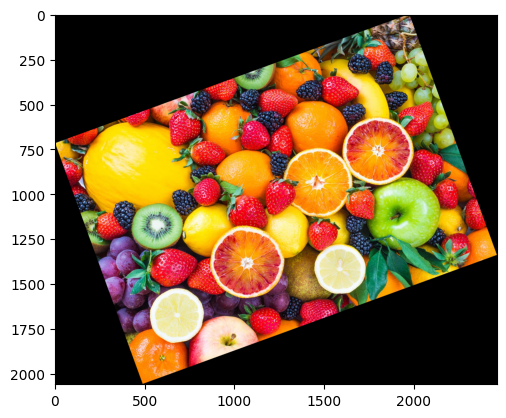

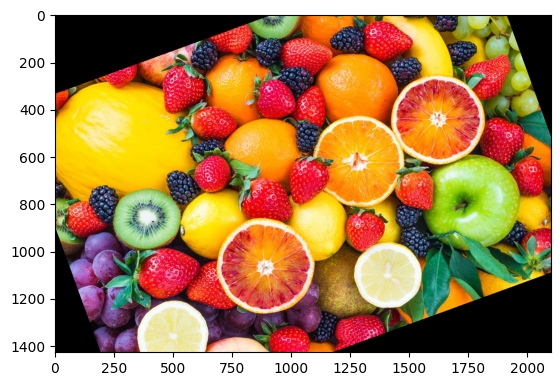

In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
print(data.shape)
d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()
d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()

1.5. Dilation và Erosion

(309, 515)


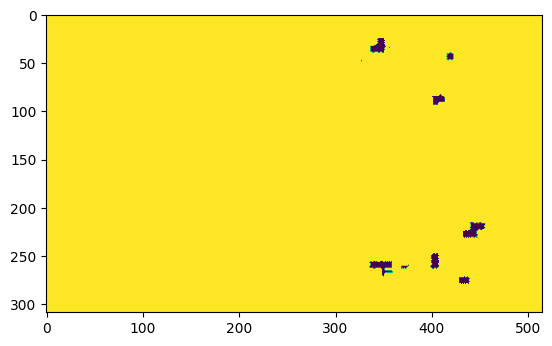

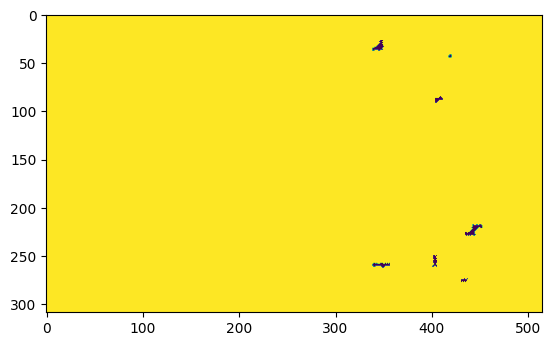

In [6]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)
d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()
d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()

1.6. Coordinate mapping

(309, 515)


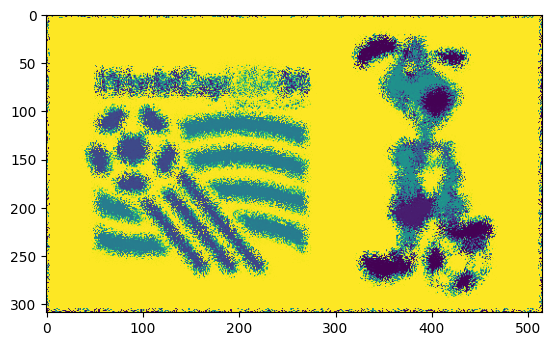

In [7]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)
V, H = data.shape
M = np.indices((V, H))
d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()

1.7. Biến đổi chung

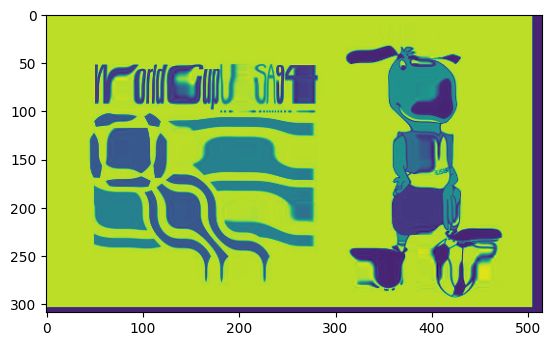

In [8]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b
data = iio.imread('world_cup.jpg', mode='F')
d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1)
plt.show()

2. Bài Tập

bt1

In [16]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from PIL import Image
img = Image.open('exercise/colorful-ripe-tropical-fruits.jpg')
translated_img = Image.new('RGB', img.size)
translated_img.paste(img, (30, 0))
translated_img.save('kiwi.jpg')

bt2

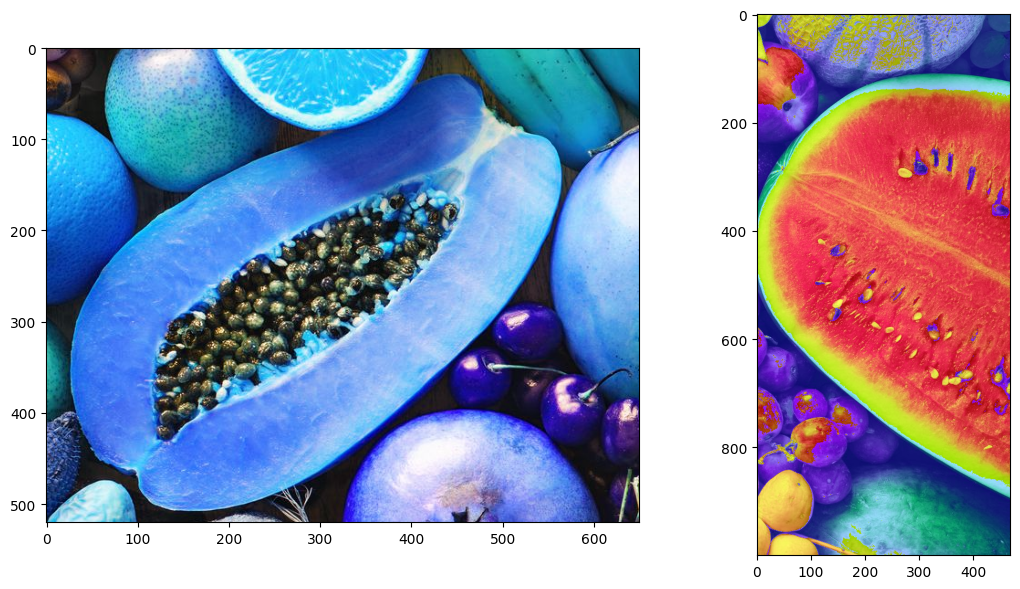

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
dudu = img[300:820, 100:750]
duahau = img[200:1200, 1650:2500]
dudu[:, :, [0, 2]] = dudu[:, :, [2, 0]]
duahau[:, :, 2] = np.clip(duahau[:, :, 0] + 100, 0, 255)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(dudu)
axes[1].imshow(duahau)
plt.tight_layout()
plt.show()

bt3

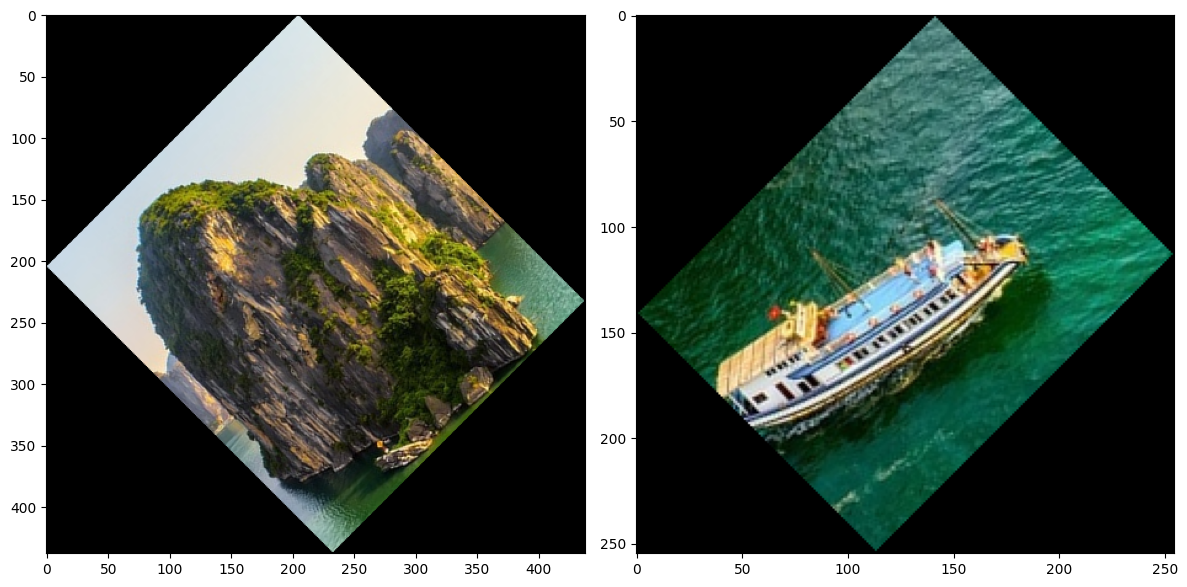

In [13]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
img = iio.imread('exercise/quang_ninh.jpg')
nui = img[0:330, 410: 700]
thuyen = img[420:580, 500:700]
xoay_ngon_nui = nd.rotate(nui, 45, reshape=True)
xoay_con_thuyen = nd.rotate(thuyen, 45, reshape=True)
iio.imsave('ngon_nui.jpg', xoay_ngon_nui)
iio.imsave('con_thuyen.jpg', xoay_con_thuyen)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(xoay_ngon_nui)
axes[1].imshow(xoay_con_thuyen)

plt.tight_layout()
plt.show()

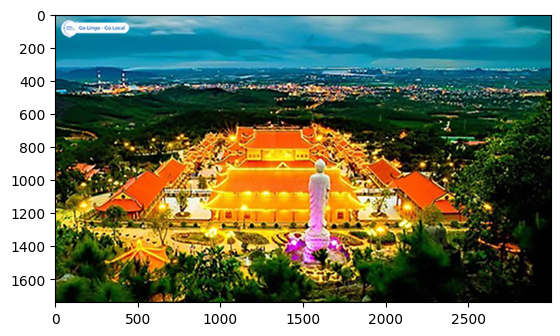

In [11]:
#bt4
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
img = iio.imread('exercise/pagoda.jpg')
pagoda = img[130:210, 0:600]
upsizePagoda = nd.zoom(img, (5, 5, 1))
iio.imsave('pagodaZoomX5.jpg', upsizePagoda)
plt.imshow(upsizePagoda)
plt.show()

Danh sách 3 hình ảnh đầu tiên trong thư mục 'exercise':
1. colorful-ripe-tropical-fruits.jpg
2. ha-long-bay-in-vietnam.jpg
3. pagoda.jpg



Chọn thao tác:
T - Tịnh tiến
X - Xoay ảnh
P - Phóng to
H - Thu nhỏ
C - Coordinate Map


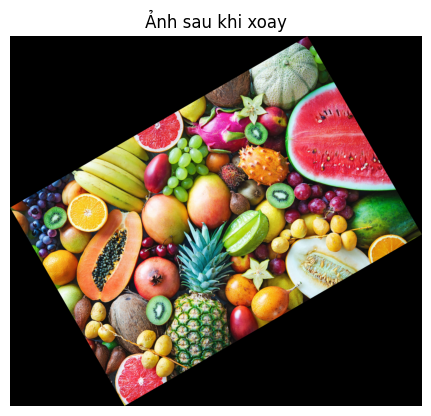

In [ ]:
#bt5
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
import os
folder = 'exercise'
def hien_thi_anh(img, title="Kết quả"):
    plt.imshow(img.astype(np.uint8))
    plt.title(title)
    plt.axis('off')
    plt.show()
def tinhTien(img, shift_x=30, shift_y=30):
    return nd.shift(img, shift=(shift_y, shift_x, 0))
def xoay(img, angle=45):
    return nd.rotate(img, angle, reshape=True)
def phongto_thunho(img, vector):
    return nd.zoom(img, (vector, vector, 1))
def coordinate_map(img):
    if img.ndim == 3:
        data = img.mean(axis=2)
    else:
        data = img

    V, H = data.shape
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.ranf(M.shape) - d
    mp = (M + q).astype(int)
    mp[0] = np.clip(mp[0], 0, V - 1)
    mp[1] = np.clip(mp[1], 0, H - 1)
    d1 = nd.map_coordinates(data, mp)
    plt.imshow(d1, cmap='gray')
    plt.title("Coordinate Map")
    plt.axis('off')
    plt.show()

files = [f for f in os.listdir(folder) if f.lower().endswith('.jpg')][:3]

if not files:
    print("Không tìm thấy ảnh trong thư mục.")
    exit()

print("Danh sách 3 hình ảnh đầu tiên trong thư mục 'exercise':")
for i, f in enumerate(files):
    print(f"{i+1}. {f}")

index = int(input("Chọn số thứ tự ảnh muốn xử lý (1-3): ")) - 1
if index < 0 or index >= len(files):
    print("Lựa chọn không hợp lệ.")
    exit()

file_path = os.path.join(folder, files[index])
img = iio.imread(file_path)

print("\nChọn thao tác:")
print("T - Tịnh tiến")
print("X - Xoay ảnh")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Coordinate Map")
choice = input("Nhập lựa chọn của bạn (T/X/P/H/C): ").strip().upper()
if choice == 'T':
    dx = int(input("Nhập giá trị tịnh tiến ngang (dx): "))
    dy = int(input("Nhập giá trị tịnh tiến dọc (dy): "))
    result = tinhTien(img, dx, dy)
    hien_thi_anh(result, "Ảnh sau khi tịnh tiến")
elif choice == 'X':
    angle = float(input("Nhập góc xoay (độ): "))
    result = xoay(img, angle)
    hien_thi_anh(result, "Ảnh sau khi xoay")
elif choice == 'P':
    vector = float(input("Nhập hệ số phóng to (>1): "))
    result = phongto_thunho(img, vector)
    hien_thi_anh(result, "Ảnh sau khi phóng to")
elif choice == 'H':
    vector = float(input("Nhập hệ số thu nhỏ (<1): "))
    result = phongto_thunho(img, vector)
    hien_thi_anh(result, "Ảnh sau khi thu nhỏ")
elif choice == 'C':
    coordinate_map(img)
else:
    print("Lựa chọn không hợp lệ.")
